#  Real Estate-Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("Data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286940,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705159,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.626000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

In [7]:
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

## Train test Spliting

In [8]:
# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     train_indices=shuffled[test_set_size:]
#     test_indices=shuffled[:test_set_size]
#     return data.iloc[train_indices],data.iloc[test_indices]
    

In [9]:
# train_set,test_set=split_train_test(housing,0.2)

In [10]:
# len(train_set),len(test_set)

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices,test_indices in split.split(housing, housing["CHAS"]):
    strat_train_set=housing.loc[train_indices]
    strat_train_set=housing.loc[test_indices]

In [13]:
housing=strat_train_set.copy()
housing.describe()   # before imputing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.00000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.30425,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.66923,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.13800,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.90325,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.17600,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.54225,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.72500,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

In [14]:
corr_matrix=housing.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.170482,0.389608,-0.039831,0.406703,-0.101056,0.334546,-0.367583,0.573310,0.534409,0.248474,-0.001447,0.422718,-0.388768
ZN,-0.170482,1.000000,-0.512578,-0.105074,-0.549740,0.385859,-0.591533,0.663712,-0.330439,-0.287485,-0.396485,0.124512,-0.397020,0.449562
INDUS,0.389608,-0.512578,1.000000,0.141410,0.779183,-0.434144,0.645150,-0.702257,0.648795,0.735135,0.379055,-0.287499,0.568668,-0.534485
CHAS,-0.039831,-0.105074,0.141410,1.000000,0.149212,0.053341,0.200891,-0.143104,0.055659,0.016982,-0.080906,0.055498,0.046699,0.043900
NOX,0.406703,-0.549740,0.779183,0.149212,1.000000,-0.309797,0.747775,-0.790687,0.672553,0.701561,0.279674,-0.209033,0.534982,-0.450991
RM,-0.101056,0.385859,-0.434144,0.053341,-0.309797,1.000000,-0.233728,0.198632,-0.256784,-0.338329,-0.462387,0.158160,-0.675387,0.771285
AGE,0.334546,-0.591533,0.645150,0.200891,0.747775,-0.233728,1.000000,-0.798805,0.479122,0.523048,0.267858,-0.193513,0.613910,-0.434078
DIS,-0.367583,0.663712,-0.702257,-0.143104,-0.790687,0.198632,-0.798805,1.000000,-0.541721,-0.543534,-0.293318,0.194474,-0.475214,0.292944
RAD,0.573310,-0.330439,0.648795,0.055659,0.672553,-0.256784,0.479122,-0.541721,1.000000,0.906537,0.438676,-0.189472,0.522985,-0.414798
TAX,0.534409,-0.287485,0.735135,0.016982,0.701561,-0.338329,0.523048,-0.543534,0.906537,1.000000,0.416353,-0.261821,0.582399,-0.525037


In [15]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.771285
ZN         0.449562
DIS        0.292944
B          0.168425
CHAS       0.043900
CRIM      -0.388768
RAD       -0.414798
AGE       -0.434078
NOX       -0.450991
TAX       -0.525037
INDUS     -0.534485
PTRATIO   -0.573036
LSTAT     -0.726741
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>]], dtype=object)

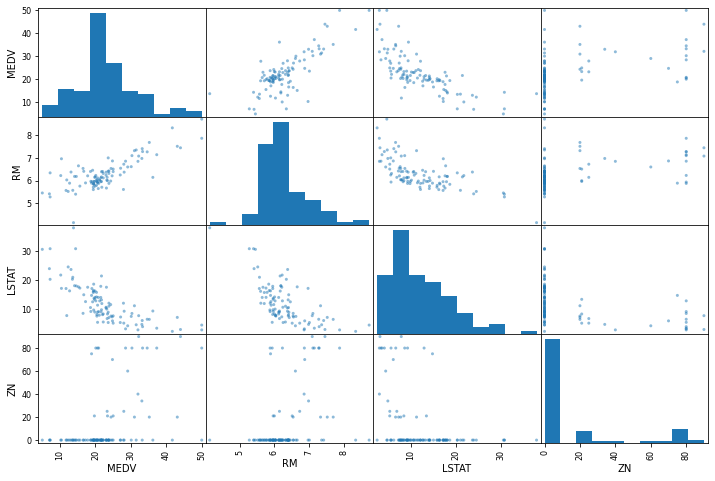

In [16]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","LSTAT","ZN"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

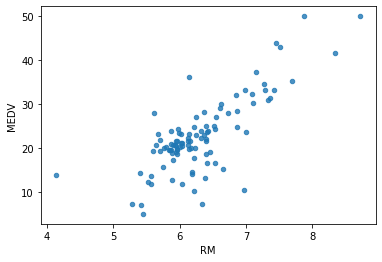

In [17]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

# Attribute Combination

In [18]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [19]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5,64.525994
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1,46.388637
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0,43.307704
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4,43.156140


In [20]:
corr_matrix=housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.771285
ZN         0.449562
DIS        0.292944
B          0.168425
CHAS       0.043900
CRIM      -0.388768
RAD       -0.414798
AGE       -0.434078
NOX       -0.450991
TAX       -0.525037
INDUS     -0.534485
PTRATIO   -0.573036
TAXRM     -0.609839
LSTAT     -0.726741
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

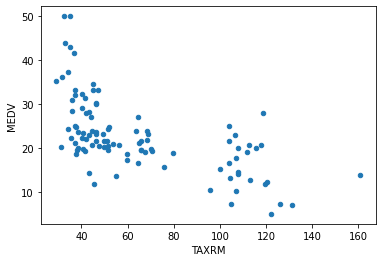

In [21]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV")

# Missing Attributes

In [22]:
housing["RM"].isnull()

342    False
379    False
223    False
219    False
48     False
       ...  
88     False
466    False
52     False
121    False
218    False
Name: RM, Length: 102, dtype: bool

In [23]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.00000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.30425,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490,64.214374
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.66923,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344,31.077323
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.13800,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000,28.994929
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.90325,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000,40.473349
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.17600,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000,50.539778
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.54225,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000,83.635098
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.72500,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,160.947318


In [24]:
a=housing.dropna(subset=["RM"]) #droping the data point
a.shape

(100, 15)

In [25]:
b=housing.drop("RM",axis=1)   #droping the feature
b.shape

(102, 14)

In [26]:
median=housing["RM"].median()  #replacing none values by median/mean of the feature
housing["RM"].fillna(median)
housing.shape

(102, 15)

In [27]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_

array([1.7615000e-01, 0.0000000e+00, 7.7600000e+00, 0.0000000e+00,
       5.1500000e-01, 6.1760000e+00, 7.1100000e+01, 3.4229500e+00,
       5.0000000e+00, 3.0700000e+02, 1.9150000e+01, 3.9374000e+02,
       1.0565000e+01, 2.1500000e+01, 5.0539778e+01])

In [29]:
X=imputer.transform(housing)

In [30]:
X

array([[2.49800000e-02, 0.00000000e+00, 1.89000000e+00, ...,
        8.65000000e+00, 1.65000000e+01, 6.45259939e+01],
       [1.78667000e+01, 0.00000000e+00, 1.81000000e+01, ...,
        2.17800000e+01, 1.02000000e+01, 1.07022336e+02],
       [6.14700000e-01, 0.00000000e+00, 6.20000000e+00, ...,
        7.60000000e+00, 3.01000000e+01, 4.63886371e+01],
       ...,
       [5.36000000e-02, 2.10000000e+01, 5.64000000e+00, ...,
        5.28000000e+00, 2.50000000e+01, 3.73214560e+01],
       [7.16500000e-02, 0.00000000e+00, 2.56500000e+01, ...,
        1.42700000e+01, 2.03000000e+01, 3.13124584e+01],
       [1.10690000e-01, 0.00000000e+00, 1.38900000e+01, ...,
        1.79200000e+01, 2.15000000e+01, 4.63787599e+01]])

In [31]:
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()   #after imputing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.301735,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490,63.946245
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662812,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344,30.827026
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000,28.994929
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000,40.572953
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000,50.539778
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000,78.717047
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,160.947318
